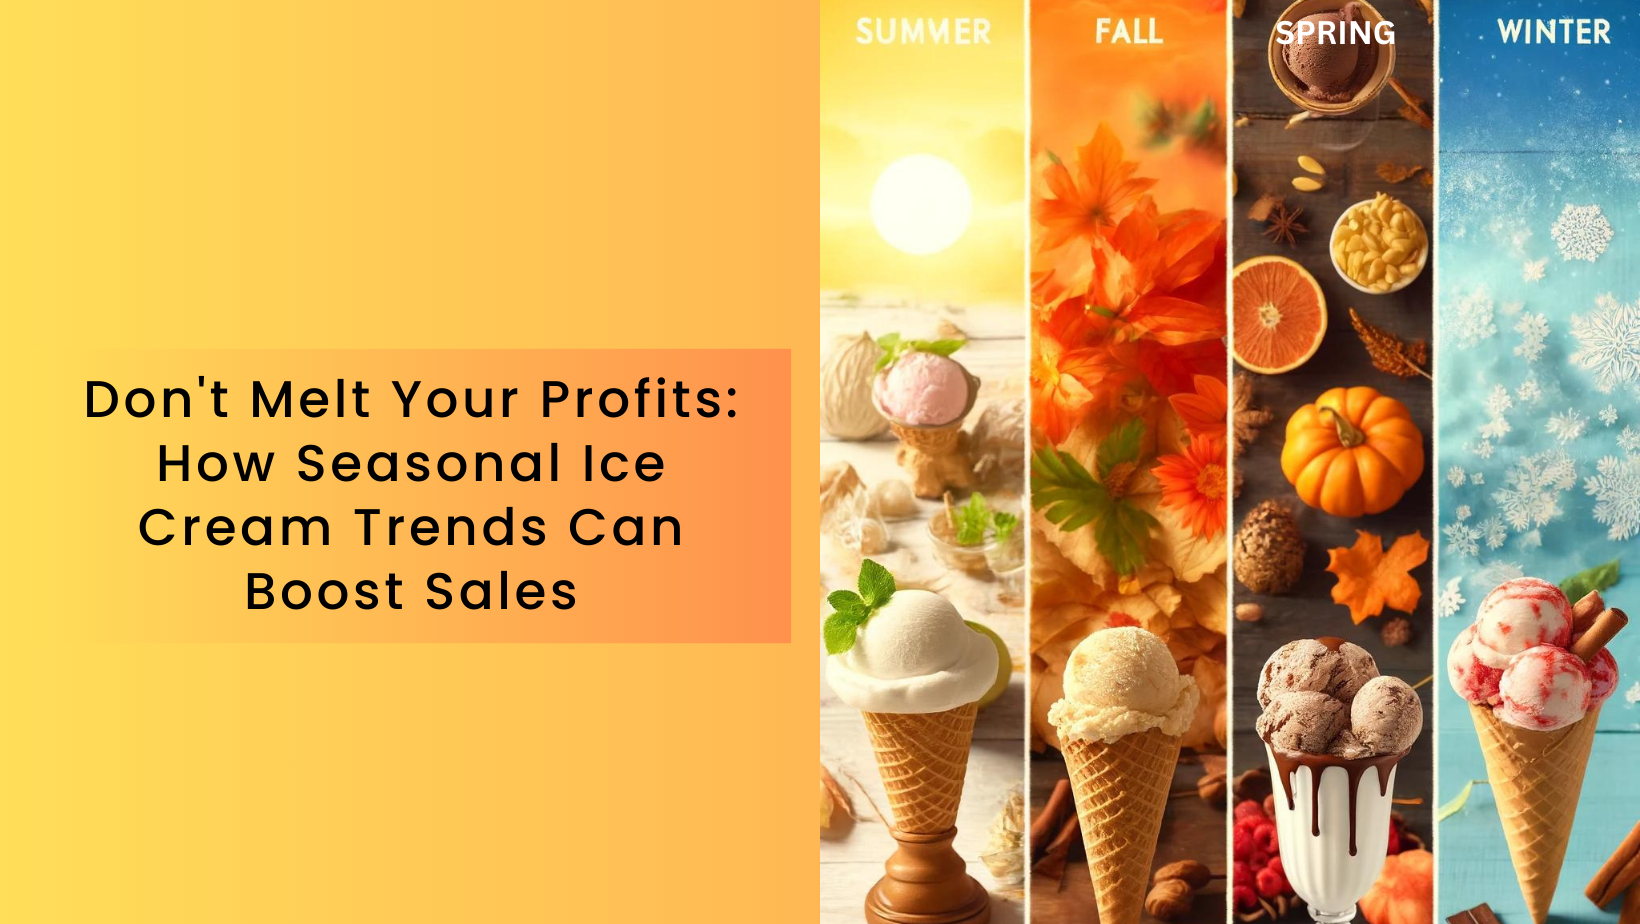

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Ice%20Cream.csv')

In [20]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [22]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [23]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989841
Revenue,0.989841,1.000000


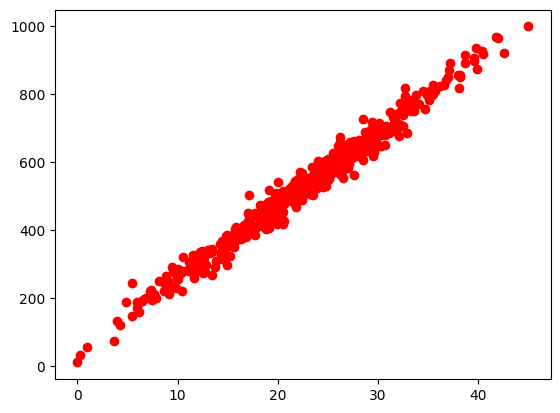

In [25]:
plt.scatter(df.Temperature,df["Revenue"],color='red')



In [26]:
df.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [27]:
X=df[['Temperature']]
y=df['Revenue']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss= StandardScaler()

In [33]:
X_train=ss.fit_transform(X_train)

In [41]:
pd.DataFrame(X_train).describe()

,0
count,3.750000e+02
mean,-8.052818e-17
std,1.001336e+00
min,-2.789015e+00
25%,-6.159680e-01
50%,2.905746e-02
75%,6.427711e-01
max,2.847130e+00


**ss.fit_transform** mean aprox to 0 and standard deviation aprox to 1.

In [43]:
X_test=ss.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
pd.DataFrame(X_test).describe()

,0
count,125.000000
mean,-2.658255
std,0.119564
min,-2.960631
25%,-2.742241
50%,-2.665663
75%,-2.570649
max,-2.370695


**ss.transform** it just save operation , doesn't convert values, #Prevent Data Leakage

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
lr.coef_

array([171.41650712])

In [50]:
lr.intercept_

522.1013333333333

#Model training is done!

In [52]:
#Predicting the values for training and testing sets

y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import r2_score

In [55]:
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_test_pred)

In [56]:
print(f"Train Accuracy: {train_accuracy}")

print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9781820533168901
Test Accuracy: -6.131294932062477


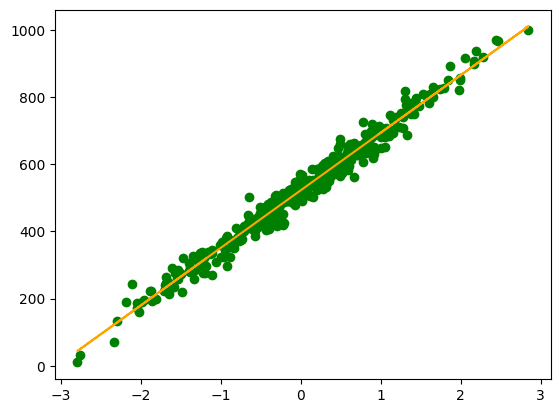

In [68]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,lr.predict(X_train),color='orange')

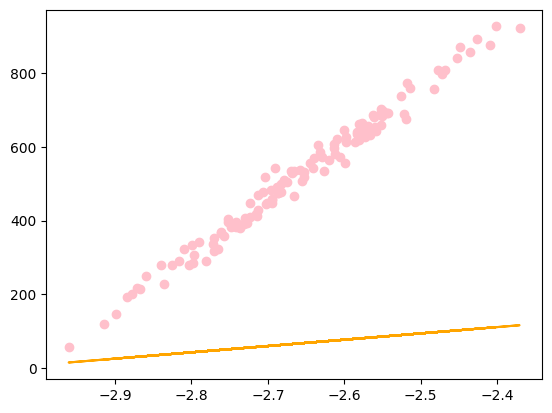

In [65]:
## plot Training data plot best fit line
plt.scatter(X_test,y_test,color='pink')
plt.plot(X_test,lr.predict(X_test),color='orange')

In [69]:
## Performance Metrics for Trian Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

655.3894836459028
19.917327903988664
25.600575845982505


In [60]:
## Performance Metrics for Test Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

233279.1681007921
455.4954395564784
482.98982194327044


# Hence Coclusion : Our Model is in Underfitting

1.   High Bias
2.   High Variance

